# Predict Income Category

### Given cencus data on peoples age, marital status, education etc, determine whether or not their income exceeds $50,000 using a supervised learning algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = r'C:\Users\John Green\Downloads\adult.data'

In [3]:
columns = ['age' , 'employee_type' , 'fnlwgt' , 'education' , 'education_num' , 'married' , 'occupation' ,
          'relationship' , 'race' , 'sex' , 'capital_gain' , 'capital_loss' , 'hours_per_week' , 'country' , 
          'income']
data = pd.read_csv(file_path , names = columns)

In [4]:
data.head()

,age,employee_type,fnlwgt,education,education_num,married,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   employee_type   32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   married         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   employee_type   32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   married         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Break the dataframe into numerical, categorical and label data

In [7]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data , test_size = 0.2 , random_state = 0)

In [8]:
data_num = data.iloc[:,[0,2,4,10,11,12]]
data_num.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [9]:
data_cat = data.iloc[:,[1,3,5,6,7,8,9,13]]
data_cat.head()

,employee_type,education,married,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [10]:
data_label = train[['income']]
data_label.head()

,income
15282,<=50K
24870,<=50K
18822,<=50K
26404,<=50K
7842,<=50K


### Great, now let's create some pipelines to process the data. I will normalize the numerical data using StandardScaler and use OneHotEncoder for the categorical data. 

In [11]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.preprocessing import OneHotEncoder
#(NOTE: 
#DataFrameSelector was first presented in Hands-On Machine Learning with Scikit-Learn & TensorFlow by Aurelien Geron)

class DataFrameSelector(BaseEstimator , TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X , y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_att = list(data_num)

num_pipeline = Pipeline([       
    ('selector' , DataFrameSelector(num_att)),
    ('simpleimputer' , SimpleImputer(strategy = 'median')), #Replaces any missing values with median
    ('std_scaler' , StandardScaler())
])

#data_num_pipe = num_pipeline.fit_transform(data_num)

In [13]:
#data_num_pipe

In [14]:

cat_pipeline = Pipeline([
    ('selector' , DataFrameSelector(data_cat.columns)),
    ('label_binarizer' , OneHotEncoder())
])

#data_cat_pipe = cat_pipeline.fit_transform(data_cat).toarray()  #need to convert to an array from a sparse matrix

In [15]:
#data_cat_pipe

In [16]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline' , num_pipeline),
    ('cat_pipeline' , cat_pipeline)
])

In [17]:
data_prepared = full_pipeline.fit_transform(train) #fit and transform the training data

In [18]:
data_prepared = pd.DataFrame(data_prepared.toarray())#processed data!!!
data_prepared.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,-0.189281,-0.143997,-1.192884,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.262660,0.082715,-0.415106,-0.145891,-0.216579,1.107450,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042523,-1.295350,1.140451,-0.145891,-0.216579,0.781113,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.838021,-0.485935,-0.415106,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.158837,-0.688671,0.362672,-0.145891,5.092257,-0.034732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#Replacing categorical data with numerical data (<50K == 0 , >50K == 1)
#data_labels = data_label.replace([' <=50K' , ' >50K' ] , [0 ,1]) 
#data_labels = np.array(data_labels).ravel() 

In [22]:
def label_replace(labels):
    data_labels = labels.replace([' <=50K' , ' >50K' ] , [0 ,1]) 
    data_labels = np.array(data_labels).ravel() 
    return data_labels

data_labels = label_replace(data_label)

In [23]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier()
tree.fit(data_prepared , data_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
%time print('Random Forest Score: {}'.format(tree.score(data_prepared , data_labels)))

Random Forest Score: 1.0
Wall time: 656 ms


In [25]:
from sklearn.model_selection import cross_val_score


%time print(cross_val_score(tree, X = data_prepared, y = data_labels, cv = 5 , n_jobs = -1))

[0.85930902 0.85834933 0.85527831 0.85601843 0.85448263]
Wall time: 14.4 s


### One problem we notice is that the runtimes for these models are quite long. This isn't because of the number of instances -- rather, this is because of the number of categorical features that got converted to numerical values. We have over 100 features for each instance! To solve this problem, we can try to drop the features that aren't important. Let's do this by using the feature_importances_ method.

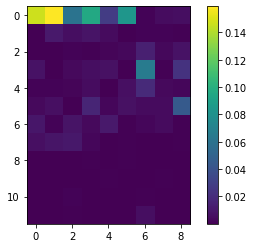

In [27]:
plt.imshow(tree.feature_importances_.reshape(12,9))
plt.colorbar()

### Note that many of the features aren't very important (rows below 7). We can drop these features from the training and labeled data and see how much more efficient the model becomes. Let's drop features that fall below $10^{-3}$ feature importance.

In [29]:
def feature_eng(model, data_prep_var):
    col_list = []
    for col, fi in zip(data_prep_var.columns , model.feature_importances_):
        if fi < 1E-3:
            col_list.append(col)
        else:
            pass
    new_data = data_prep_var.drop(col_list, axis = 'columns')
    return new_data

data_prep_new = feature_eng(tree, data_prepared)
data_prep_new.head()

,0,1,2,3,4,5,6,7,8,10,...,59,60,61,63,64,65,66,68,92,105
0,-0.189281,-0.143997,-1.192884,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.262660,0.082715,-0.415106,-0.145891,-0.216579,1.107450,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.042523,-1.295350,1.140451,-0.145891,-0.216579,0.781113,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.838021,-0.485935,-0.415106,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.158837,-0.688671,0.362672,-0.145891,5.092257,-0.034732,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Now the less important features have been dropped from the training set. Let's see how this affects model performance and computational time.

In [30]:
feature_tree = RandomForestClassifier(random_state = 42)
feature_tree.fit(data_prep_new, data_labels)
%time cross_val_score(feature_tree , X = data_prep_new , y = data_labels, cv = 5, n_jobs = -1)

Wall time: 8.46 s


array([0.86161228, 0.85873321, 0.85585413, 0.85813016, 0.85294682])

### Notice that the accuracy of the model did not drop significantly, but the runtime was drastically reduced. Feature engineering is very important for reducing the computational cost of training models!

### We may also want to visualize how well the model predicts each class. Let's use a Confusion Matrix to do this.

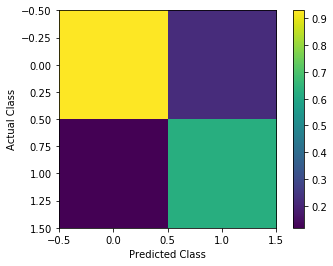

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

data_labels_predict = cross_val_predict(feature_tree, X = data_prep_new , y = data_labels, n_jobs = -1)
conf_matrix = confusion_matrix(data_labels, data_labels_predict)
plt.imshow(conf_matrix/conf_matrix.sum(axis = 1))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.colorbar()

### While class 0 (less than 50k salary earners) is predicted very well, the model doesn't perform as well for salaries greater than 50k. This could explain why our cv scores in the ~85% range. This model can be improved if we focus on why it performs poorly on class 1.   

### We can also use GridSearchCV to fine-tune the hyperparameters of the RandomForestClassifier

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [200,400,500] , 'max_features' : [20,50,100] }]

try:
    %time grid_search = GridSearchCV(feature_tree, param_grid , cv = 5, n_jobs = -1)
    print('Complete')
except:
    print('Error occured')

Wall time: 0 ns
Complete


In [33]:
#This fitting takes a long time!
try:
    %time grid_search.fit(data_prep_new, data_labels)
    print('Complete')
except:
    print("error")

Wall time: 8min 52s
Complete


In [34]:
grid_search.best_params_

{'max_features': 20, 'n_estimators': 400}

In [35]:
grid_search.cv_results_['mean_test_score']

array([0.85929814, 0.86052662, 0.86048821, 0.85791594, 0.85818472,
       0.85806955,        nan,        nan,        nan])

### Say we like one of these models and we want to save it without having to re-fit the data. We can use sklearns built-in pickle function to do that.

In [36]:
from joblib import dump, load
dump(grid_search, 'Income_cat.joblib')

['Income_cat.joblib']

### Now let's run the test data through the pipelines and see how accurate the model performes.

In [37]:
data_prepared_test = full_pipeline.transform(test)
data_prepared_test1 = pd.DataFrame(data_prepared_test.toarray())
data_labels_test = test[['income']]
data_labels_test = label_replace(data_labels_test)

In [38]:
data_prepared_test = feature_eng(tree, data_prepared_test1)

In [39]:
data_prepared_test.head()

,0,1,2,3,4,5,6,7,8,10,...,59,60,61,63,64,65,66,68,92,105
0,-0.849689,-0.117326,-0.026217,-0.145891,-0.216579,0.291606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.849689,0.256151,1.140451,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.996447,0.633613,0.751562,-0.145891,-0.216579,-0.034732,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.544506,-0.397030,-2.748440,-0.145891,4.482074,-0.034732,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.471127,-0.158097,-1.192884,-0.145891,6.759760,2.902308,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
print('Test data score: {}'.format(feature_tree.score(data_prepared_test, data_labels_test)))

Test data score: 0.8498387839705205


In [41]:
%time cross_val_score(feature_tree, X = data_prepared_test, y = data_labels_test , cv = 5, n_jobs = -1)

Wall time: 2.17 s


array([0.85188028, 0.83192632, 0.85188028, 0.85637481, 0.83794163])

### There are more things that we can do here to improve the model. Notice that the model performs slightly better on the training data than the test data. This could imply that the model is overfitting. We can tune hyperparameters more, or try other classification models. 

### Another thing we didn't try was stratifying our training and testing data so that our samples are better representations of the entire dataset. This will improve the models ability to generalize to the test set.

### There are many other things we can try here! But this is a good stopping point. Happy coding!